<a href="https://colab.research.google.com/github/Jeniejean/Applied-Stat/blob/main/Cleaned_Data_Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rows: 203 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): carat, cut, color, clarity, depth, table, price, x, y, z

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


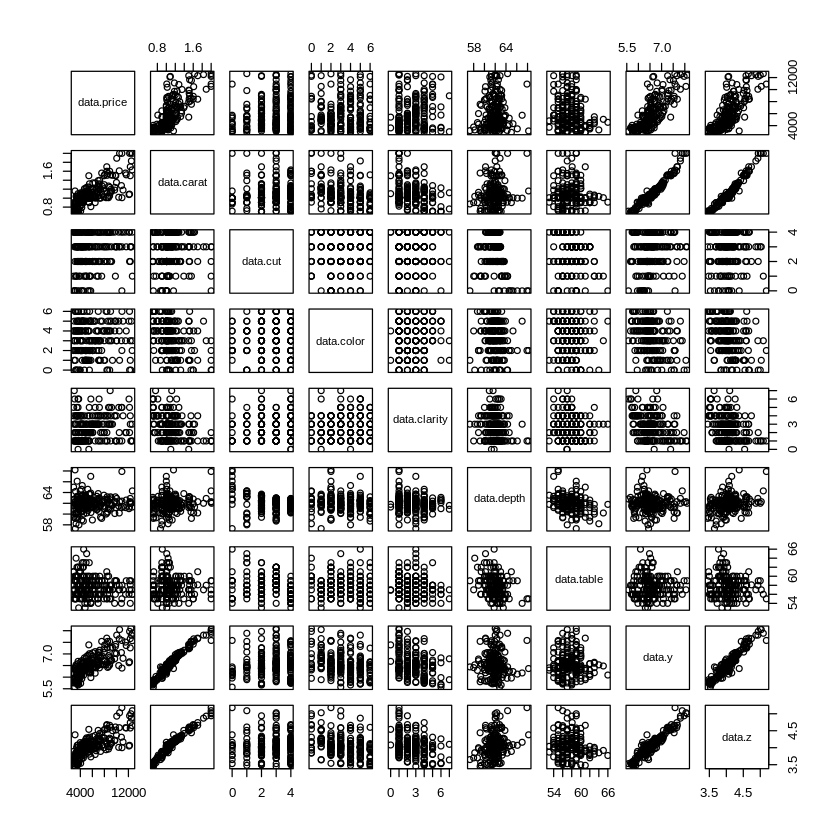

In [132]:
library(readr)
data <- read_csv("https://raw.githubusercontent.com/Jeniejean/Applied-Stat/main/Diamond_Data%20(3).csv")
dataf <- data.frame(data$price, data$carat, data$cut, data$color, data$clarity, data$depth, data$table, data$y, data$z)
pairs(dataf)

In [133]:
dataf <- data.frame(data)
model <- lm(price~ carat+cut+color+clarity+depth+y+z, data = data)
library(MASS)
step.model <- stepAIC(model, direction = "both", trace = FALSE)
summary(step.model)


Call:
lm(formula = price ~ cut + color + clarity + depth + y, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2024.04  -582.36    26.43   511.83  2578.76 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50330.66    3099.14 -16.240  < 2e-16 ***
cut            121.63      57.03   2.133   0.0342 *  
color          477.39      39.46  12.100  < 2e-16 ***
clarity        777.89      46.47  16.741  < 2e-16 ***
depth          304.82      45.51   6.698 2.16e-10 ***
y             5106.73     140.37  36.381  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 895.7 on 197 degrees of freedom
Multiple R-squared:  0.8786,	Adjusted R-squared:  0.8756 
F-statistic: 285.2 on 5 and 197 DF,  p-value: < 2.2e-16


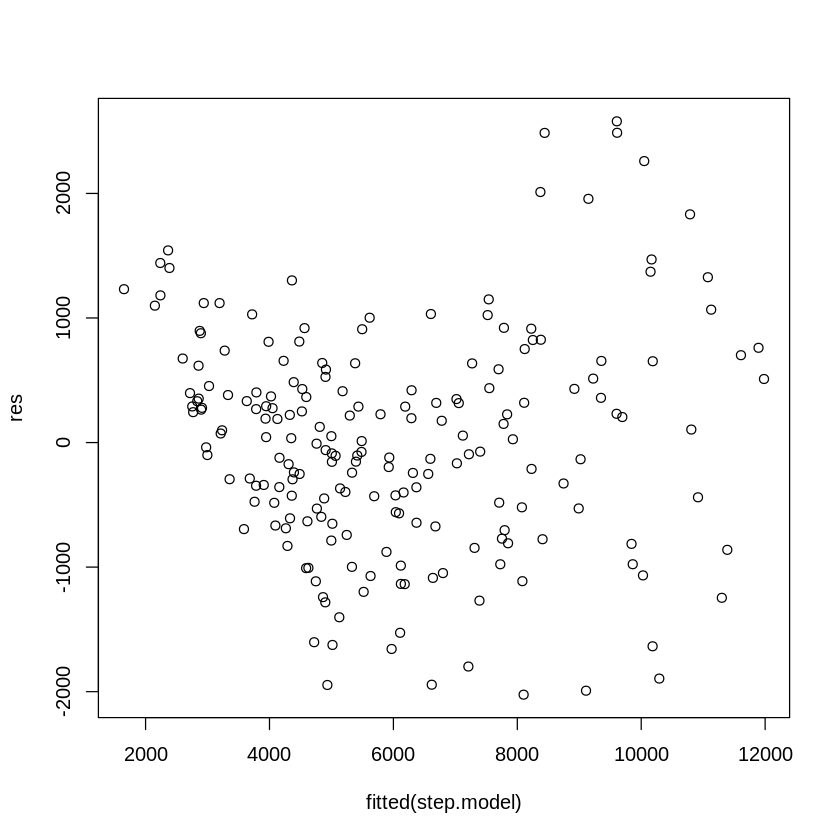

In [134]:
res <- resid(step.model)
plot(fitted(step.model), res)

In [135]:
install.packages("car")
library(car)
durbinWatsonTest(step.model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 lag Autocorrelation D-W Statistic p-value
   1       0.2184589      1.549828   0.002
 Alternative hypothesis: rho != 0

In [127]:
out<-cooks.distance(step.model)
out

1            2            3            4            5            6 
1.947884e-02 3.713091e-03 1.150051e-04 9.806432e-06 6.663356e-02 4.831968e-04 
           7            8            9           10           11           12 
3.102876e-04 1.426771e-03 1.072361e-03 6.630185e-02 6.365550e-04 3.749753e-03 
          13           14           15           16           17           18 
6.368419e-04 1.571999e-03 8.036377e-03 3.535143e-03 2.020458e-03 1.142267e-04 
          19           20           21           22           23           24 
5.832763e-05 1.058701e-02 9.405000e-04 1.397784e-02 2.922583e-03 3.581042e-04 
          25           26           27           28           29           30 
2.883728e-03 5.665038e-03 1.315341e-03 7.466505e-04 3.300329e-03 4.429718e-03 
          31           32           33           34           35           36 
2.318878e-03 1.333378e-02 1.005744e-02 1.093626e-02 7.333442e-03 1.012636e-02 
          37           38           39           40           41           42 
1.054546e-03 2.202811e-03 1.889697e-02 1.541827e-02 3.730503e-03 1.883636e-02 
          43           44           45           46           47           48 
5.588612e-04 2.015351e-02 8.085852e-04 3.677566e-04 3.589958e-03 5.221675e-06 
          49           50           51           52           53           54 
2.344644e-03 5.656070e-05 4.498088e-04 5.643703e-03 3.476992e-04 1.141858e-04 
          55           56           57           58           59           60 
8.977653e-05 2.124770e-04 1.453477e-03 2.857269e-03 3.110110e-04 2.101198e-03 
          61           62           63           64           65           66 
2.984373e-04 1.838767e-03 7.738123e-03 1.351525e-02 4.143626e-04 4.839332e-03 
          67           68           69           70           71           72 
4.756768e-04 3.778263e-03 2.135539e-03 2.297847e-06 5.488360e-04 8.543978e-04 
          73           74           75           76           77           78 
5.066387e-03 4.684919e-04 1.496212e-02 9.467885e-03 2.576065e-02 4.918420e-03 
          79           80           81           82           83           84 
3.479269e-07 7.275501e-04 3.289361e-04 3.061749e-03 6.063288e-04 1.073158e-05 
          85           86           87           88           89           90 
8.308622e-05 1.070485e-03 1.371170e-03 3.343070e-05 6.178368e-05 5.799172e-04 
          91           92           93           94           95           96 
5.082178e-04 2.342201e-05 7.159643e-03 2.638462e-03 4.195920e-03 1.772972e-05 
          97           98           99          100          101          102 
3.261605e-04 4.962243e-03 2.511558e-04 1.116551e-03 1.735954e-03 4.713348e-05 
         103          104          105          106          107          108 
1.099420e-05 2.828016e-02 1.292119e-03 2.256812e-03 6.311767e-03 2.110202e-03 
         109          110          111          112          113          114 
1.085363e-03 3.512179e-07 3.102765e-04 8.879931e-04 7.054996e-03 7.754266e-04 
         115          116          117          118          119          120 
4.849936e-04 7.063437e-03 4.902929e-04 1.878489e-04 8.473261e-03 1.107185e-02 
         121          122          123          124          125          126 
9.233396e-04 1.932956e-05 3.491442e-03 3.937939e-04 6.436778e-04 1.041424e-04 
         127          128          129          130          131          132 
1.748632e-04 1.476890e-02 5.273322e-03 1.810762e-04 1.432703e-03 2.249400e-03 
         133          134          135          136          137          138 
9.575569e-05 1.777378e-04 9.664304e-05 2.380807e-03 3.136977e-04 5.843730e-03 
         139          140          141          142          143          144 
7.395394e-05 5.618031e-05 8.899916e-03 3.539076e-03 2.618746e-04 3.677890e-03 
         145          146          147          148          149          150 
1.362873e-03 4.721684e-02 5.136841e-05 1.625631e-05 7.740810e-04 2.916754e-05 
         151          152          153          154          

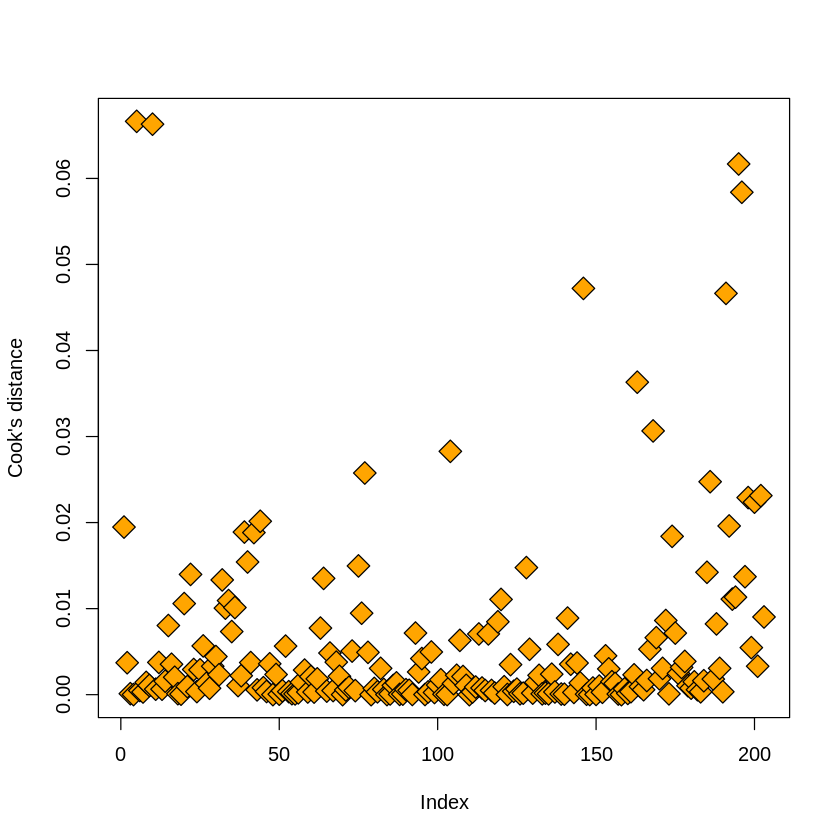

In [128]:
plot(cooks.distance(step.model), pch=23, bg='orange', cex=2, ylab="Cook's distance")

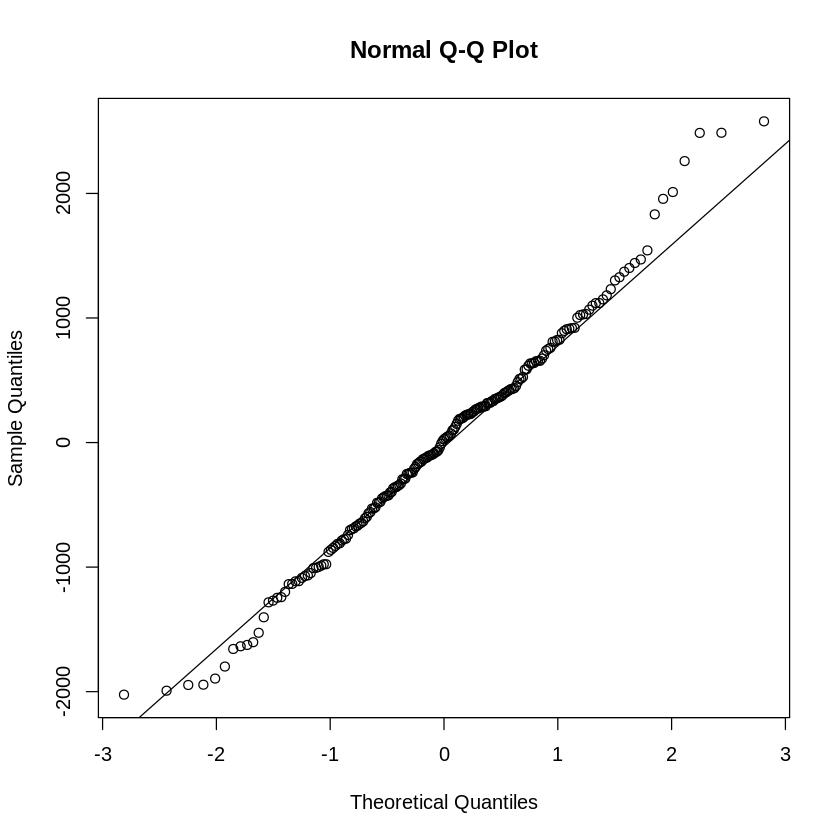

In [129]:
qqnorm(res)
qqline(res)

In [130]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.99047, p-value = 0.2003


In [131]:
install.packages("car")
library(car)
vif(step.model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



cut    color  clarity    depth        y 
1.152604 1.152898 1.142443 1.137948 1.278985